#Importing Libraries:

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Importing Datasets:

In [163]:
test_file=pd.read_csv("test.csv")
train_file=pd.read_csv("train.csv")
test_file.info()
print("-------------------------------------------------------")
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  

#TOP 10 ROWS OF Test & Train:

In [164]:
test_file.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [165]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#Checking the shape of Datasets:

In [166]:
print("Test.csv Shape=",test_file.shape)
print("Train.csv Shape=",train_file.shape)


Test.csv Shape= (418, 11)
Train.csv Shape= (891, 12)


# Checking the Columns in our Datasets:

In [167]:
print("Columns Of Test.csv\n",test_file.columns)

Columns Of Test.csv
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [168]:
print("Columns Of Train.csv\n",train_file.columns)

Columns Of Train.csv
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Checking the total Nan values of all Columns:

In [169]:
print("Test.csv Columns Having Nan Values:\n",test_file.isnull().sum())

Test.csv Columns Having Nan Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [170]:
print("Train.csv Columns Having Nan Values:\n",train_file.isnull().sum())

Train.csv Columns Having Nan Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#Dropping Duplicates:

In [171]:
test_file=test_file.drop_duplicates()
test_file=test_file.dropna()
train_file=train_file.drop_duplicates()
train_file=train_file.dropna()

#Handling Missing Values In Train.csv:

In [172]:
mean_of_train_age=train_file.Age.mean()
mode_of_train_embarked=train_file.Embarked.mode()#I am taking mode bcz it is a categoricial  column
mode_of_train_cabin=train_file.Cabin.mode()#I am taking mode bcz it is a categoricial  column

In [173]:
train_file.Age.fillna(value=mean_of_train_age, inplace=True)
train_file['Embarked'].fillna(train_file['Embarked'].mode()[0], inplace=True)
train_file['Cabin'].fillna(train_file['Cabin'].mode()[0], inplace=True)
#------------------------------------------------------------------------
test_file.Age.fillna(value=mean_of_train_age, inplace=True)
test_file['Cabin'].fillna(test_file['Cabin'].mode()[0], inplace=True)
mean_of_train_fare=train_file.Fare.mean()
test_file.Fare.fillna(value=mean_of_train_fare, inplace=True)


In [174]:
print("Train.csv Columns Having Nan Values:\n",train_file.isnull().sum())

Train.csv Columns Having Nan Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [175]:
print("Test.csv Columns Having Nan Values:\n",test_file.isnull().sum())

Test.csv Columns Having Nan Values:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#Checking Outliers:

<Axes: >

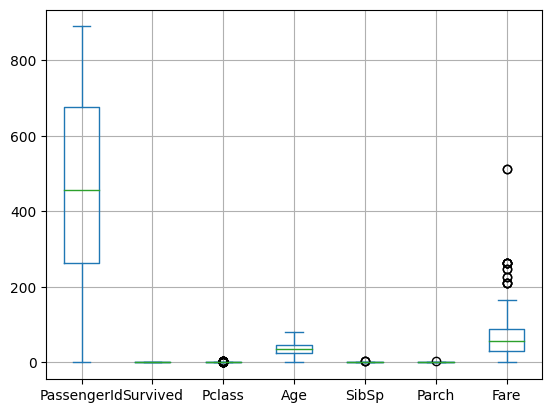

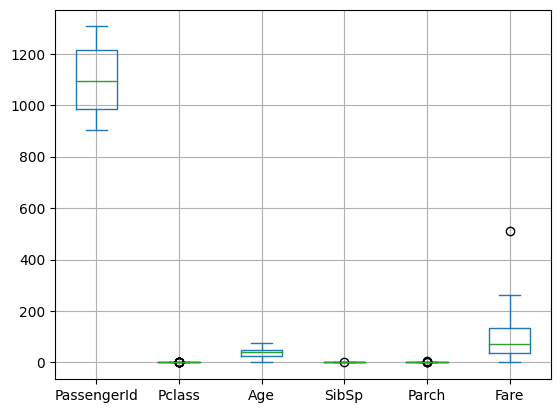

In [176]:
train_file.plot.box(grid=True)
test_file.plot.box(grid=True)


In [177]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

#Checking the total number of outliers of these columns:

In [178]:
print("Number of Outliers in Train.csv:\n")
print("OUTLIERS IN Pclass COLUMNS=")
out_zscore(train_file.Pclass)
print("OUTLIERS IN SibSp COLUMNS=")
out_zscore(train_file.SibSp)
print("OUTLIERS IN Parch COLUMNS=")
out_zscore(train_file.Parch)
print("OUTLIERS IN Fare COLUMNS=")
out_zscore(train_file.Fare)
print("-----------------------------------------------------------------------------------")
print("Number of Outliers in Test.csv:\n")
print("OUTLIERS IN Pclass COLUMNS=")
out_zscore(test_file.Pclass)
print("OUTLIERS IN SibSp COLUMNS=")
out_zscore(test_file.SibSp)
print("OUTLIERS IN Parch COLUMNS=")
out_zscore(test_file.Parch)
print("OUTLIERS IN Fare COLUMNS=")
out_zscore(test_file.Fare)

Number of Outliers in Train.csv:

OUTLIERS IN Pclass COLUMNS=
Total number of outliers are 10
OUTLIERS IN SibSp COLUMNS=
Total number of outliers are 3
OUTLIERS IN Parch COLUMNS=
Total number of outliers are 1
OUTLIERS IN Fare COLUMNS=
Total number of outliers are 2
-----------------------------------------------------------------------------------
Number of Outliers in Test.csv:

OUTLIERS IN Pclass COLUMNS=
Total number of outliers are 3
OUTLIERS IN SibSp COLUMNS=
Total number of outliers are 1
OUTLIERS IN Parch COLUMNS=
Total number of outliers are 1
OUTLIERS IN Fare COLUMNS=
Total number of outliers are 1


#Removing Outliers:

In [179]:
def remove_outliers(data):
    lower_threshold = np.quantile(data, 0.25)
    upper_threshold = np.quantile(data, 0.75)
    filtered_data = [x for x in data if lower_threshold <= x <= upper_threshold]
    return filtered_data

In [180]:
print("Values After Removing Outliers From Fare:\n",remove_outliers(train_file.Fare))
print("Values After Removing Outliers From Parch:\n",remove_outliers(train_file.Parch))
print("Values After Removing Outliers From SibSp:\n",remove_outliers(train_file.SibSp))
print("Values After Removing Outliers From Pclass:\n",remove_outliers(train_file.Pclass))
#-------------------------------------------------------------------------------------------
print("Values After Removing Outliers From Fare:\n",remove_outliers(test_file.Fare))
print("Values After Removing Outliers From Parch:\n",remove_outliers(test_file.Parch))
print("Values After Removing Outliers From SibSp:\n",remove_outliers(test_file.SibSp))
print("Values After Removing Outliers From Pclass:\n",remove_outliers(test_file.Pclass))

Values After Removing Outliers From Fare:
 [71.2833, 53.1, 51.8625, 35.5, 76.7292, 61.9792, 83.475, 61.175, 34.6542, 63.3583, 77.2875, 52.0, 77.2875, 53.1, 79.2, 66.6, 33.5, 30.6958, 39.0, 31.0, 76.2917, 90.0, 83.475, 90.0, 52.5542, 86.5, 79.65, 29.7, 77.9583, 56.9292, 83.1583, 57.9792, 66.6, 35.5, 55.0, 75.25, 69.3, 55.4417, 90.0, 55.9, 81.8583, 30.5, 89.1042, 38.5, 90.0, 29.7, 30.5, 78.2667, 86.5, 34.0208, 57.9792, 49.5, 71.0, 39.6, 79.65, 51.4792, 55.9, 40.125, 79.65, 79.2, 78.2667, 56.9292, 39.0, 52.5542, 32.3208, 77.9583, 30.0, 30.5, 69.3, 76.7292, 35.5, 52.0, 76.7292, 57.0, 49.5042, 52.0, 53.1, 78.85, 71.0, 53.1, 86.5, 77.9583, 57.0, 30.0, 79.2, 53.1, 83.1583, 39.4, 50.4958, 52.5542, 83.1583, 30.0, 30.0]
Values After Removing Outliers From Parch:
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

#standardize_features():

In [181]:
from sklearn.preprocessing import MinMaxScaler
def normalize_features(data):
# Create a MinMaxScaler object
  scaler = MinMaxScaler()

# Reshape the data to a 2D array (required by the scaler)
  data_2d = [[value] for value in data]

# Apply Min-Max scaling
  normalized_data = scaler.fit_transform(data_2d)

# Flatten the normalized data back to a 1D array
  normalized_data = normalized_data.flatten()

  print(normalized_data)


In [182]:
arr=['PassengerId', 'Survived', 'Pclass' , 'Age' , 'SibSp' , 'Parch' , 'Fare']
for i in arr:
  print("Feature ",str(i),"After Normilizing\n",normalize_features(train_file[i]))
  print("---------------------------------------------------------")

[0.         0.00225225 0.00563063 0.01013514 0.01126126 0.02252252
 0.02477477 0.02927928 0.05743243 0.05968468 0.06869369 0.0731982
 0.08333333 0.09797297 0.10247748 0.10698198 0.10810811 0.11373874
 0.12274775 0.13175676 0.13738739 0.13851351 0.15202703 0.15315315
 0.15540541 0.16554054 0.16891892 0.19031532 0.19481982 0.1981982
 0.20495495 0.21621622 0.21734234 0.21846847 0.22972973 0.23423423
 0.24099099 0.24436937 0.25112613 0.25788288 0.27477477 0.27815315
 0.28153153 0.28265766 0.28828829 0.29391892 0.29504505 0.30067568
 0.3018018  0.30630631 0.30855856 0.32657658 0.3277027  0.33333333
 0.33558559 0.34234234 0.34459459 0.34684685 0.34797297 0.3490991
 0.35698198 0.35810811 0.36486486 0.36711712 0.36936937 0.37162162
 0.37274775 0.37725225 0.37837838 0.38063063 0.38175676 0.38288288
 0.38738739 0.39977477 0.41103604 0.41441441 0.41554054 0.42342342
 0.43806306 0.44144144 0.44256757 0.46283784 0.48198198 0.48310811
 0.48761261 0.48873874 0.49211712 0.5        0.5045045  0.5078828

In [183]:
arr=['PassengerId', 'Pclass' , 'Age' , 'SibSp' , 'Parch' , 'Fare']
for i in arr:
  print("Feature ",str(i),"After Normilizing\n",normalize_features(test_file[i]))
  print("---------------------------------------------------------")

[0.         0.00497512 0.02985075 0.03482587 0.039801   0.05472637
 0.07960199 0.08457711 0.08955224 0.09452736 0.10199005 0.1119403
 0.11691542 0.12935323 0.13930348 0.14179104 0.15174129 0.15422886
 0.15671642 0.16169154 0.17164179 0.19900498 0.20895522 0.21890547
 0.24129353 0.24875622 0.25373134 0.26119403 0.26368159 0.27363184
 0.2960199  0.32338308 0.34328358 0.35820896 0.36318408 0.38308458
 0.41044776 0.41293532 0.41542289 0.42039801 0.42288557 0.4278607
 0.45771144 0.47263682 0.48756219 0.50497512 0.51243781 0.52238806
 0.55223881 0.55721393 0.56467662 0.5721393  0.57960199 0.59701493
 0.64179104 0.64676617 0.6840796  0.69900498 0.72885572 0.73134328
 0.73631841 0.75124378 0.75621891 0.76865672 0.77114428 0.78109453
 0.79353234 0.80348259 0.82338308 0.84079602 0.85323383 0.85572139
 0.87562189 0.89303483 0.89552239 0.90049751 0.91044776 0.94029851
 0.94278607 0.95273632 0.95771144 0.96517413 0.97512438 0.97761194
 0.98258706 0.99253731 1.        ]
Feature  PassengerId After No

In [189]:
from sklearn.preprocessing import OneHotEncoder
# Create an instance of OneHotEncoder
"""
encoder = OneHotEncoder(categories=[['female' , 'male']])
train_file['Sex'] = encoder.fit_transform(train_file[['Sex']])"""
train_file.Sex
#for females it is 0 and for males it is 1

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 183, dtype: object

In [202]:
 df = pd.DataFrame(train_file)
 encoder = OneHotEncoder()
 encoded_data = encoder.fit_transform(df[['Sex']])
 encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Sex']))
 df_encoded = pd.concat([df.drop('Sex', axis=1), encoded_df], axis=1)
 df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,S,1.0,0.0
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",54.0,0.0,0.0,17463,51.8625,E46,S,0.0,1.0
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",4.0,1.0,1.0,PP 9549,16.7000,G6,S,0.0,1.0
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",58.0,0.0,0.0,113783,26.5500,C103,S,1.0,0.0


In [203]:
 df = pd.DataFrame(test_file)
 encoder = OneHotEncoder()
 encoded_data = encoder.fit_transform(df[['Sex']])
 encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Sex']))
 df_encoded = pd.concat([df.drop('Sex', axis=1), encoded_df], axis=1)
 df_encoded.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
12,904.0,1.0,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.0,1.0,0.0,21228,82.2667,B45,S,1.0,0.0
14,906.0,1.0,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",47.0,1.0,0.0,W.E.P. 5734,61.1750,E31,S,0.0,1.0
24,916.0,1.0,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",48.0,1.0,3.0,PC 17608,262.3750,B57 B59 B63 B66,C,0.0,1.0
26,918.0,1.0,"Ostby, Miss. Helene Ragnhild",22.0,0.0,1.0,113509,61.9792,B36,C,1.0,0.0
28,920.0,1.0,"Brady, Mr. John Bertram",41.0,0.0,0.0,113054,30.5000,A21,S,0.0,1.0
